# EDA - Primera parte

#### CONTEXTO ####

La tarea es hacer un EDA, ETL en el dataset ***"homicidios.xlsx"*** para generar un dataframe con los datos separados, limpios y normalizados que sera utilizado para creacion de un <br> Dashboard de analisis de datos, conteniendo las metricas y KPIs relevantes para la muestra y analisis de datos.  

----------------------------------------------

En esta primera parte del **EDA** cargaremos de el archivo ***"homicidios.xlsx"*** para verificar los datos **Nulos, Duplicados** y **Valores faltantes** y tener un contexto de cual son las caracteristicas <br> del dataset y la informacion que entrega cada columna ademas de los tipos de datos, seguidamente explicaremos el criterio para la eliminacion de las columnas descartables. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Volcamos la data del dataset a un dataframe

In [2]:
df_1 = pd.read_excel('Data\homicidios.xlsx')

Verificamos la longitud, las columnas, la cantidad de nulos por columna, y la cabecera para contextualizar los tipos de datos de cada columna   

In [3]:
print(len(df_1))
print(df_1.isnull().sum())
print(df_1.columns)

df_1.head(10)

696
ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64
Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')


,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
5,2016-0008,1,2016-01-24,2016,1,24,18:30:00,18,AV 27 DE FEBRERO Y AV ESCALADA,AVENIDA,...,NaN,ESCALADA AV.,27 DE FEBRERO AV. y ESCALADA AV.,8,Point (101721.59002217 93844.25656649),-58.44451316,-34.68475866,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO
6,2016-0009,1,2016-01-24,2016,1,24,19:10:00,19,NOGOYA Y JOAQUIN V. GONZALES,CALLE,...,NaN,"GONZALEZ, JOAQUIN V.","NOGOYA y GONZALEZ, JOAQUIN V.",11,Point (96545.87592078 102330.67262199),-58.50095869,-34.60825440,MOTO-AUTO,MOTO,AUTO
7,2016-0010,1,2016-01-29,2016,1,29,15:20:00,15,AV GENERAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,MOTO-AUTO,MOTO,AUTO
8,2016-0012,1,2016-02-08,2016,2,8,01:20:00,1,AV BELGRANO Y BERNARDO DE IRIGOYEN,AVENIDA,...,NaN,"IRIGOYEN, BERNARDO DE","BELGRANO AV. e IRIGOYEN, BERNARDO DE",1,Point (107595.35084333 101797.50052813),-58.38048577,-34.61303893,MOTO-CARGAS,MOTO,CARGAS
9,2016-0013,1,2016-02-10,2016,2,10,11:30:00,11,AV ENTRE RIOS 1366,AVENIDA,...,1366.0,NaN,ENTRE RIOS AV. 1366,1,Point (106616.41069662 100496.44662323),-58.39114932,-34.62477387,PEATON-AUTO,PEATON,AUTO


Revisando el DF podemos observar diferentes columnas, el primer criterio para ver cuales columnas deben ser desechadas es verificar si los datos mostrados por la columna son redundantes <br>
siguiendo este criterio vemos que la columna **"Altura"** esta plasmada en la columna **"LUGAR_DEL_HECHO"**, ademas en los lugares donde los valores son nulos, no aparecen la otra columna. 

--------------------------------------

El segundo criterio para la eliminacion de columnas es la importancia de estas mismas para las metricas y KPIs que van a ser presentadas en 

In [4]:
df_1_v2 = df_1.copy()

In [5]:
df_1_v2 = df_1_v2.drop(['Altura', 'XY (CABA)', 'pos x', 'pos y'], axis=1)

In [6]:
print(len(df_1_v2))
print(df_1_v2.isnull().sum())
print(df_1_v2.columns)

df_1_v2.head(10)

696
ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64
Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'PARTICIPANTES', 'VICTIMA',
       'ACUSADO'],
      dtype='object')


,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Cruce,Dirección Normalizada,COMUNA,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,NaN,ENTRE RIOS AV. 2034,1,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,MOTO-PASAJEROS,MOTO,PASAJEROS
5,2016-0008,1,2016-01-24,2016,1,24,18:30:00,18,AV 27 DE FEBRERO Y AV ESCALADA,AVENIDA,27 DE FEBRERO AV.,ESCALADA AV.,27 DE FEBRERO AV. y ESCALADA AV.,8,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO
6,2016-0009,1,2016-01-24,2016,1,24,19:10:00,19,NOGOYA Y JOAQUIN V. GONZALES,CALLE,NOGOYA,"GONZALEZ, JOAQUIN V.","NOGOYA y GONZALEZ, JOAQUIN V.",11,MOTO-AUTO,MOTO,AUTO
7,2016-0010,1,2016-01-29,2016,1,29,15:20:00,15,AV GENERAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,MOTO-AUTO,MOTO,AUTO
8,2016-0012,1,2016-02-08,2016,2,8,01:20:00,1,AV BELGRANO Y BERNARDO DE IRIGOYEN,AVENIDA,BELGRANO AV.,"IRIGOYEN, BERNARDO DE","BELGRANO AV. e IRIGOYEN, BERNARDO DE",1,MOTO-CARGAS,MOTO,CARGAS
9,2016-0013,1,2016-02-10,2016,2,10,11:30:00,11,AV ENTRE RIOS 1366,AVENIDA,ENTRE RIOS AV.,NaN,ENTRE RIOS AV. 1366,1,PEATON-AUTO,PEATON,AUTO


In [7]:
df_ver1 = df_1_v2[df_1_v2["Cruce"].isnull()]
df_ver2 = df_1_v2[df_1_v2["Calle"].isnull()]
df_ver3 = df_1_v2[df_1_v2["Dirección Normalizada"].isnull()]

In [8]:
df_ver1.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Cruce,Dirección Normalizada,COMUNA,PARTICIPANTES,VICTIMA,ACUSADO
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,NaN,ENTRE RIOS AV. 2034,1,MOTO-AUTO,MOTO,AUTO
9,2016-0013,1,2016-02-10,2016,2,10,11:30:00,11,AV ENTRE RIOS 1366,AVENIDA,ENTRE RIOS AV.,NaN,ENTRE RIOS AV. 1366,1,PEATON-AUTO,PEATON,AUTO
14,2016-0020,1,2016-02-17,2016,2,17,16:00:00,16,SUIPACHA 156,CALLE,SUIPACHA,NaN,SUIPACHA 156,1,PEATON-AUTO,PEATON,AUTO
33,2016-0047,1,2016-04-15,2016,4,15,05:30:00,5,LIMA 1483,CALLE,LIMA,NaN,LIMA 1483,1,PEATON-PASAJEROS,PEATON,PASAJEROS
35,2016-0049,1,2016-04-17,2016,4,17,00:00:00,0,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI KM....,AUTOPISTA,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,SD-SD,SD,SD


In [9]:
df_ver2

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Cruce,Dirección Normalizada,COMUNA,PARTICIPANTES,VICTIMA,ACUSADO
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,NaN,NaN,NaN,0,PEATON-SD,PEATON,SD


In [10]:
df_ver3

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Cruce,Dirección Normalizada,COMUNA,PARTICIPANTES,VICTIMA,ACUSADO
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,"LUGONES, LEOPOLDO AV.",NaN,NaN,13,MOTO-SD,MOTO,SD
106,2016-0136,1,2016-10-25,2016,10,25,00:00:00,0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,AUTOPISTA BUENOS AIRES - LA PLATA,NaN,NaN,4,MOTO-CARGAS,MOTO,CARGAS
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,NaN,NaN,NaN,0,PEATON-SD,PEATON,SD
180,2017-0050,2,2017-04-28,2017,4,28,11:08:08,11,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,AUTOPISTA PERITO MORENO,NaN,NaN,9,MOTO-CARGAS,MOTO,CARGAS
181,2017-0051,1,2017-05-01,2017,5,1,03:47:47,3,AU DELLEPIANE 2400,AUTOPISTA,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,NaN,NaN,7,AUTO-AUTO,AUTO,AUTO
313,2018-0039,1,2018-04-21,2018,4,21,22:15:00,22,AUTOPISTA LUGONES KM 4.7,AUTOPISTA,"LUGONES, LEOPOLDO AV.",NaN,NaN,14,PEATON-AUTO,PEATON,AUTO
546,2020-0026,1,2020-05-17,2020,5,17,06:40:00,6,"LUGONES, LEOPOLDO AV. KM 6,1",AUTOPISTA,"LUGONES, LEOPOLDO AV.",NaN,NaN,14,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO
621,2021-0023,1,2021-03-01,2021,3,1,09:20:00,9,"AU BUENOS AIRES LA PLATA KM 4,5",AUTOPISTA,AUTOPISTA BUENOS AIRES - LA PLATA,NaN,NaN,4,MOTO-CARGAS,MOTO,CARGAS


# EDA - Segunda Parte, Outliers

Columna **"ACUSADO"**

In [11]:
df_1_ACUSADO = df_1_v2.copy()

In [12]:
val_unicos_ACUSADO = df_1_ACUSADO['ACUSADO'].unique()

val_conteo_ACUSADO = df_1_ACUSADO['ACUSADO'].value_counts()

In [13]:
promedio_1 = np.mean(val_conteo_ACUSADO)

promedio_1_lista = []

for x in val_conteo_ACUSADO:

    dstd_1 = np.sqrt(((x - promedio_1)**2) / len(val_conteo_ACUSADO))

    promedio_1_lista.append(dstd_1)
    
    promedio_1_lista = [round(x, 2) for x in promedio_1_lista]

In [14]:
print(promedio_1)
print(promedio_1_lista)

69.6
[42.5, 32.7, 24.16, 2.4, 3.98, 14.74, 16.63, 19.8, 20.11, 21.69]


In [15]:
df_1_ACUSADO_V2 = pd.DataFrame({'Valores_Unicos': val_unicos_ACUSADO, 'Frecuencia': val_conteo_ACUSADO[val_unicos_ACUSADO].values, 'Desviacion estandar': promedio_1_lista})

In [16]:
print(len(df_1_ACUSADO_V2))
df_1_ACUSADO_V2.head(10)

10


,Valores_Unicos,Frecuencia,Desviacion estandar
0,AUTO,204,42.50
1,PASAJEROS,173,32.70
2,SD,23,24.16
3,OBJETO FIJO,62,2.40
4,CARGAS,146,3.98
5,MOTO,57,14.74
6,MULTIPLE,17,16.63
7,OTRO,6,19.80
8,BICICLETA,7,20.11
9,TREN,1,21.69


C:\Users\Rodrigo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rodrigo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rodrigo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalD

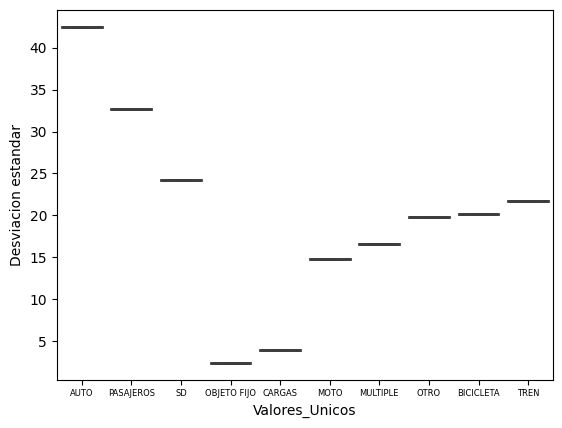

In [17]:
sns.boxplot(x="Valores_Unicos", y="Desviacion estandar", data=df_1_ACUSADO_V2, linewidth=2)
plt.xticks(fontsize=6)
plt.show()

-----------------------------------------------------------

Columna **"VICTIMA"**

In [90]:
df_1_VICTIMA = df_1_v2.copy()

In [91]:
val_unicos_VICTIMA = df_1_VICTIMA['VICTIMA'].unique()

val_conteo_VICTIMA = df_1_VICTIMA['VICTIMA'].value_counts()

In [101]:
promedio_2 = np.mean(val_conteo_VICTIMA)

promedio_2_lista = []

for x in val_conteo_VICTIMA:

    dstd_2 = np.sqrt(((x - promedio_2)**2) / len(val_conteo_VICTIMA))

    promedio_2_lista.append(dstd_2)
    
    promedio_2_lista = [round(x, 2) for x in promedio_2_lista]

In [102]:
print(promedio_2)
print(promedio_2_lista)

69.6
[71.28, 61.47, 4.24, 12.84, 19.16, 19.8, 20.43, 21.38, 21.69, 21.69]


In [103]:
df_1_VICTIMA_V2 = pd.DataFrame({'Valores_Unicos': val_unicos_VICTIMA, 'Frecuencia': val_conteo_VICTIMA[val_unicos_VICTIMA].values, 'Desviacion estandar': promedio_2_lista})

In [104]:
print(len(df_1_VICTIMA_V2))
df_1_VICTIMA_V2.head(10)

10


,Valores_Unicos,Frecuencia,Desviacion estandar
0,MOTO,295,71.28
1,AUTO,83,61.47
2,PEATON,264,4.24
3,SD,9,12.84
4,CARGAS,7,19.16
5,BICICLETA,29,19.80
6,PASAJEROS,5,20.43
7,MOVIL,2,21.38
8,OBJETO FIJO,1,21.69
9,PEATON_MOTO,1,21.69


C:\Users\Rodrigo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rodrigo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rodrigo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalD

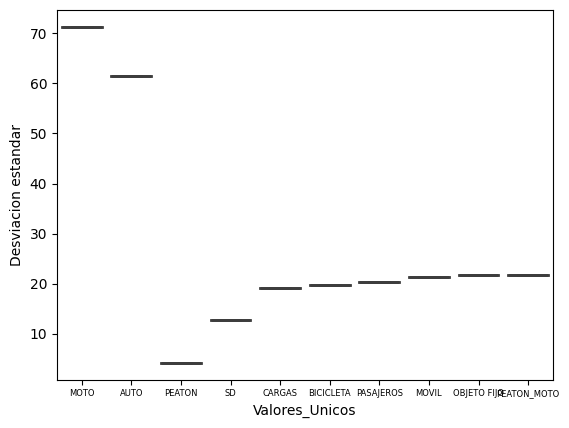

In [121]:
sns.boxplot(x="Valores_Unicos", y="Desviacion estandar", data=df_1_VICTIMA_V2, linewidth=2)
plt.xticks(fontsize=6)
plt.show()

------------------------------------------------------------------------------------

Columna **"COMUNA"**

In [126]:
df_1_COMUNA = df_1_v2.copy()

In [127]:
val_unicos_COMUNA = df_1_COMUNA['COMUNA'].unique()

val_conteo_COMUNA = df_1_COMUNA['COMUNA'].value_counts()

In [128]:
promedio_3 = np.mean(val_conteo_COMUNA)

promedio_3_lista = []

for x in val_conteo_COMUNA:

    dstd_3 = np.sqrt(((x - promedio_2)**2) / len(val_conteo_COMUNA))

    promedio_3_lista.append(dstd_3)
    
    promedio_3_lista = [round(x, 2) for x in promedio_3_lista]

In [129]:
print(promedio_3)
print(promedio_3_lista)

43.5
[5.1, 1.6, 0.85, 1.15, 2.4, 6.15, 6.4, 7.4, 8.15, 8.65, 9.4, 10.15, 11.15, 11.9, 12.15, 16.9]


In [130]:
df_1_COMUNA_V2 = pd.DataFrame({'Valores_Unicos': val_unicos_COMUNA, 'Frecuencia': val_conteo_COMUNA[val_unicos_COMUNA].values, 'Desviacion estandar': promedio_3_lista})

In [134]:
print(len(df_1_COMUNA_V2))
df_1_COMUNA_V2.head(16)

16


,Valores_Unicos,Frecuencia,Desviacion estandar
0,8,65,5.10
1,9,73,1.60
2,1,90,0.85
3,11,32,1.15
4,15,44,2.40
5,4,76,6.15
6,7,60,6.40
7,12,37,7.40
8,3,45,8.15
9,13,40,8.65


C:\Users\Rodrigo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rodrigo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rodrigo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalD

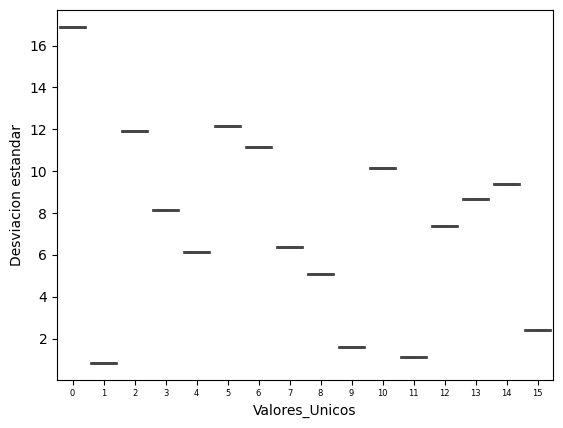

In [135]:
sns.boxplot(x="Valores_Unicos", y="Desviacion estandar", data=df_1_COMUNA_V2, linewidth=2)
plt.xticks(fontsize=6)
plt.show()

--------------------------------------

Columna **"Calle"**

In [157]:
df_1_CALLE = df_1_v2.copy()

In [158]:
df_1_CALLE["Calle"].replace(to_replace=np.nan, value='SD', inplace=True)

In [159]:
df_1_CALLE["Calle"].isnull().sum()

0

In [160]:
val_unicos_CALLE = df_1_CALLE['Calle'].unique()

val_conteo_CALLE = df_1_CALLE['Calle'].value_counts()

In [161]:
promedio_4 = np.mean(val_conteo_CALLE)

promedio_4_lista = []

for x in val_conteo_CALLE:

    dstd_4 = np.sqrt(((x - promedio_4)**2) / len(val_conteo_CALLE))

    promedio_4_lista.append(dstd_4)
    
    promedio_4_lista = [round(x, 2) for x in promedio_4_lista]

In [162]:
print(promedio_4)
print(promedio_4_lista)

2.4857142857142858
[3.26, 0.99, 0.93, 0.69, 0.63, 0.57, 0.51, 0.51, 0.45, 0.45, 0.39, 0.39, 0.33, 0.33, 0.33, 0.33, 0.33, 0.27, 0.27, 0.27, 0.27, 0.27, 0.27, 0.27, 0.21, 0.21, 0.21, 0.21, 0.15, 0.15, 0.15, 0.15, 0.15, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.

In [174]:
df_1_CALLE_V2 = pd.DataFrame({'Valores_Unicos': val_unicos_CALLE, 'Frecuencia': val_conteo_CALLE[val_unicos_CALLE].values, 'Desviacion estandar': promedio_4_lista})

In [176]:
print(len(df_1_CALLE_V2))
df_1_CALLE_V2.head(10)

280


,Valores_Unicos,Frecuencia,Desviacion estandar
0,PIEDRA BUENA AV.,2,3.26
1,"PAZ, GRAL. AV.",57,0.99
2,ENTRE RIOS AV.,7,0.93
3,LARRAZABAL AV.,1,0.69
4,SAN JUAN AV.,6,0.63
5,27 DE FEBRERO AV.,8,0.57
6,NOGOYA,2,0.51
7,BELGRANO AV.,5,0.51
8,"SCALABRINI ORTIZ, RAUL AV.",4,0.45
9,REGIMIENTO DE PATRICIOS AV.,1,0.45


In [179]:
df_1_CALLE_V3 = df_1_CALLE_V2.sort_values(by="Frecuencia", ascending=False)

In [181]:
df_1_CALLE_V3.head(15)

,Valores_Unicos,Frecuencia,Desviacion estandar
1,"PAZ, GRAL. AV.",57,0.99
61,RIVADAVIA AV.,19,0.03
41,DEL LIBERTADOR AV.,18,0.09
27,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,14,0.21
44,"ALBERDI, JUAN BAUTISTA AV.",13,0.03
56,AUTOPISTA PERITO MORENO,12,0.03
58,AUTOPISTA 25 DE MAYO,11,0.03
20,CORRIENTES AV.,11,0.27
39,SAN MARTIN AV.,10,0.09
89,CORDOBA AV.,10,0.03


In [191]:
df_1_CALLE_V3 = df_1_CALLE_V3.iloc[:10]

C:\Users\Rodrigo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rodrigo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rodrigo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalD

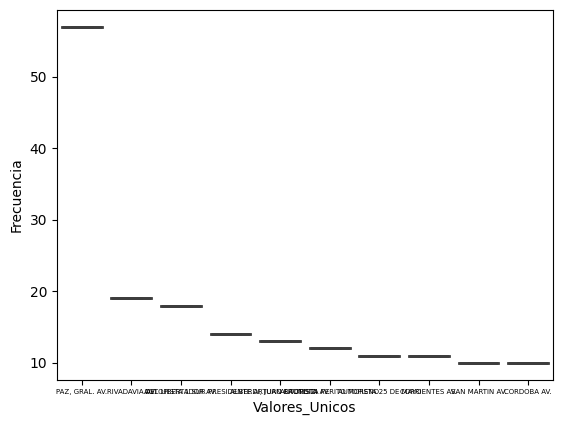

In [195]:
sns.boxplot(x="Valores_Unicos", y="Frecuencia", data=df_1_CALLE_V3, linewidth=2)
plt.xticks(fontsize=5)
plt.show()

---------------------------------------------------------------------------

Columna **"HH** - Hora del siniestro

In [182]:
df_1_HH = df_1_v2.copy()

In [183]:
val_unicos_HH = df_1_HH['HH'].unique()

val_conteo_HH = df_1_HH['HH'].value_counts()

In [184]:
promedio_5 = np.mean(val_conteo_HH)

promedio_5_lista = []

for x in val_conteo_HH:

    dstd_5 = np.sqrt(((x - promedio_5)**2) / len(val_conteo_HH))

    promedio_5_lista.append(dstd_5)
    
    promedio_5_lista = [round(x, 2) for x in promedio_5_lista]

In [185]:
print(promedio_5)
print(promedio_5_lista)

27.84
[2.63, 2.43, 1.63, 1.43, 1.03, 0.83, 0.63, 0.63, 0.63, 0.43, 0.43, 0.43, 0.43, 0.23, 0.03, 0.17, 0.37, 0.37, 0.57, 0.77, 0.97, 0.97, 2.17, 2.17, 5.37]


In [186]:
df_1_HH_V2 = pd.DataFrame({'Valores_Unicos': val_unicos_HH, 'Frecuencia': val_conteo_HH[val_unicos_HH].values, 'Desviacion estandar': promedio_5_lista})

In [187]:
print(len(df_1_HH_V2))
df_1_HH_V2.head(10)

25


,Valores_Unicos,Frecuencia,Desviacion estandar
0,4,23,2.63
1,1,24,2.43
2,7,41,1.63
3,0,23,1.43
4,5,35,1.03
5,18,31,0.83
6,19,30,0.63
7,15,25,0.63
8,11,27,0.63
9,22,30,0.43


In [188]:
df_1_HH_V3 = df_1_HH_V2.sort_values(by="Frecuencia", ascending=False)

In [189]:
df_1_HH_V3.head(15)

,Valores_Unicos,Frecuencia,Desviacion estandar
2,7,41,1.63
13,6,40,0.23
11,9,36,0.43
4,5,35,1.03
20,14,33,0.97
16,12,32,0.37
17,8,31,0.37
5,18,31,0.83
14,10,31,0.03
10,16,30,0.43


C:\Users\Rodrigo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rodrigo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rodrigo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalD

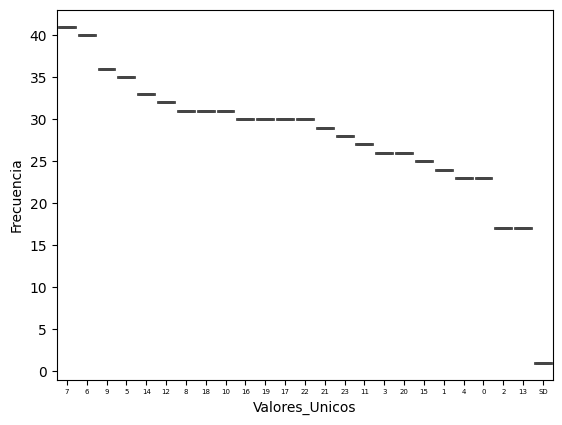

In [196]:
sns.boxplot(x="Valores_Unicos", y="Frecuencia", data=df_1_HH_V3, linewidth=2)
plt.xticks(fontsize=5)
plt.show()

----------------------------------------

Columna **"MM"** - Mes del siniestro

In [200]:
df_1_MM = df_1_v2.copy()

In [201]:
val_unicos_MM = df_1_MM['MM'].unique()

val_conteo_MM = df_1_MM['MM'].value_counts()

In [202]:
promedio_6 = np.mean(val_conteo_MM)

promedio_6_lista = []

for x in val_conteo_MM:

    dstd_6 = np.sqrt(((x - promedio_6)**2) / len(val_conteo_MM))

    promedio_6_lista.append(dstd_6)
    
    promedio_6_lista = [round(x, 2) for x in promedio_6_lista]

In [204]:
print(promedio_6)
print(promedio_6_lista)

58.0
[5.77, 2.6, 2.02, 1.15, 0.58, 0.0, 0.58, 2.02, 2.02, 2.02, 2.31, 3.18]


In [205]:
df_1_MM_V2 = pd.DataFrame({'Valores_Unicos': val_unicos_MM, 'Frecuencia': val_conteo_MM[val_unicos_MM].values, 'Desviacion estandar': promedio_6_lista})

In [207]:
print(len(df_1_MM_V2))
df_1_MM_V2.head(12)

12


,Valores_Unicos,Frecuencia,Desviacion estandar
0,1,62,5.77
1,2,56,2.60
2,3,51,2.02
3,4,50,1.15
4,5,60,0.58
5,6,58,0.00
6,7,51,0.58
7,8,65,2.02
8,9,47,2.02
9,10,51,2.02


C:\Users\Rodrigo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rodrigo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rodrigo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalD

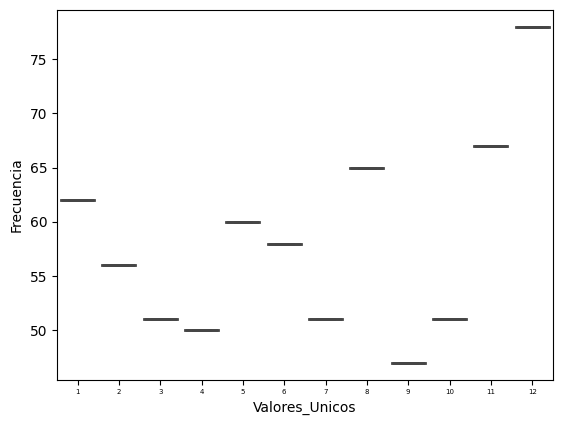

In [214]:
sns.boxplot(x="Valores_Unicos", y="Frecuencia", data=df_1_MM_V2, linewidth=2)
plt.xticks(fontsize=5)
plt.show()

-----------------------------------------------

Columna **"DD"** - Dia del siniestro

In [215]:
df_1_DD = df_1_v2.copy()

In [218]:
val_unicos_DD = df_1_DD['DD'].unique()

val_conteo_DD = df_1_DD['DD'].value_counts()

In [219]:
promedio_7 = np.mean(val_conteo_DD)

promedio_7_lista = []

for x in val_conteo_DD:

    dstd_7 = np.sqrt(((x - promedio_7)**2) / len(val_conteo_DD))

    promedio_7_lista.append(dstd_7)
    
    promedio_7_lista = [round(x, 2) for x in promedio_7_lista]

In [220]:
print(promedio_7)
print(promedio_7_lista)

22.451612903225808
[1.54, 1.36, 0.82, 0.82, 0.82, 0.64, 0.64, 0.46, 0.46, 0.46, 0.46, 0.28, 0.28, 0.1, 0.1, 0.1, 0.1, 0.1, 0.08, 0.08, 0.26, 0.44, 0.44, 0.62, 0.8, 0.8, 0.8, 0.8, 1.16, 1.52, 1.7]


In [221]:
df_1_DD_V2 = pd.DataFrame({'Valores_Unicos': val_unicos_DD, 'Frecuencia': val_conteo_DD[val_unicos_DD].values, 'Desviacion estandar': promedio_7_lista})

In [222]:
print(len(df_1_DD_V2))
df_1_DD_V2.head(12)

31


,Valores_Unicos,Frecuencia,Desviacion estandar
0,1,18,1.54
1,2,22,1.36
2,3,27,0.82
3,10,25,0.82
4,21,20,0.82
5,24,20,0.64
6,29,22,0.64
7,8,14,0.46
8,14,26,0.46
9,15,25,0.46


In [226]:
df_1_DD_V3 = df_1_DD_V2.sort_values(by="Frecuencia", ascending=False)

In [228]:
df_1_DD_V3.reset_index(inplace=True)

df_1_DD_V3.head(20)

,index,Valores_Unicos,Frecuencia,Desviacion estandar
0,20,20,31,0.26
1,10,17,30,0.46
2,2,3,27,0.82
3,19,11,27,0.08
4,26,27,27,0.80
5,13,12,26,0.10
6,8,14,26,0.46
7,11,28,25,0.28
8,3,10,25,0.82
9,28,9,25,1.16


C:\Users\Rodrigo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rodrigo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rodrigo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalD

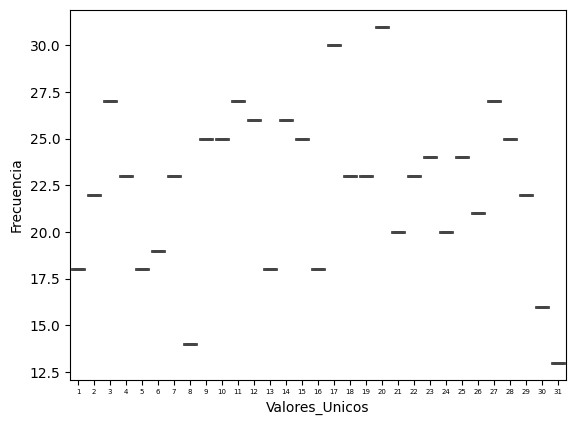

In [229]:
sns.boxplot(x="Valores_Unicos", y="Frecuencia", data=df_1_DD_V3, linewidth=2)
plt.xticks(fontsize=5)
plt.show()

Conclusiones:

Archivo gcba_pob_comunas_17

In [19]:
df_gcba = pd.read_excel('Data\gcba_pob_comunas_17.xlsx')

In [20]:
df_gcba

,COMUNA,POBLACION
0,1,253271
1,2,149720
2,3,192763
3,4,238809
4,5,186956
5,6,184846
6,7,240607
7,8,226649
8,9,170605
9,10,170282
